<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### **Input Layer:** A set of neurons which contain initial inpute data that is fed into the neural network. It is in the form of a matrix, with each rows a different observation and each column a different feature.
### **Hidden Layer:** A set of neurons in between the Input and Output Layers, in which each neuron calculated a weighted sum of the input data returns a value calculated by an "activation function" whose input is the weighted sum.
### **Output Layer:** A set of neurons which receive the results from the hidden layers and return the neural network's final calculation.
### **Neuron:** A individual node of a neural network's layers takes in some input data feeds that to calculate a weight sum, feeds that into an activation function, and feeds a resulting value to the next layer of neurons.
### **Weight:** A float value which is used to compress or decompress some input data, depending on how much meaningful information contained in that data.
### **Activation Function:** A function whose input is a neuron's weighted sum and returns a value whose form is dependent on the neural network's objective (regression, classification, etc.) 
### **Node Map:** A visual representation of the neural network's layers, neurons, and weights.
### **Perceptron:** A type of algorithm used in neural networks that is used to classify an object. 


## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

The initial data is stored in a matrix whose rows are observations and columns are features. This is called the Input Layer. This data is fed into one or more Hidden Layers, each of whose output is fed into the next sequential Hidden Layer. Each Hidden Layer is comprosed of multiple Neurons. A Neuron is fed the data from the previous layer and calculates a weighted sum of this data using a set of float parameters titled Weights. This weighted sum is adjusted using a Bias value. The resulting value is fed into an Activation Function which returns a value whose form dependets on the network's objective. This value is fed into the next layer and so on until its final regression or classification value is returned in the Output Layer.

## Write your own perceptron code that can correctly classify (99.0% accuracy) a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

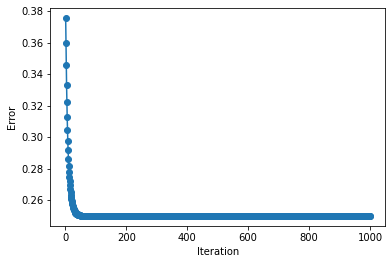

In [439]:
import numpy as np

X = np.array([
     [0, 0],
     [1, 0],
     [0, 1],
     [1, 1]
     ])

Y = np.array([[1], [1], [1], [0]])

class Perceptron:

    def __init__(self, n_iter = 1000):
        self.n_iter = n_iter
        self.errors = []

    def sigmoid(self, X):
        return 1/(1+np.exp(-X))

    def sigmoid_derivative(self, X):
        sx = sigmoid(X)
        return sx*(1-sx)
    
    def fit(self, X, Y):
        weights = np.random.randn(2, 1)
        for i in range(self.n_iter):
            weighted_sum = np.dot(X, weights)
            activated_output = self.sigmoid(weighted_sum)
            error = Y - activated_output
            adjustment = error * self.sigmoid_derivative(weighted_sum)
            weights = weights + np.dot(X.T, adjustment)
            self.errors.append(error.mean())

network = Perceptron()
network.fit(X, Y)

from matplotlib import pyplot as plt
plt.plot(range(1, len(network.errors) + 1), network.errors, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.show()

## Implement your own Perceptron Class and use it to classify a binary dataset: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [364]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Although neural networks can handle non-normalized data, scaling or normalizing your data will improve your neural network's learning speed. Try to apply the sklearn `MinMaxScaler` or `Normalizer` to your diabetes dataset. 

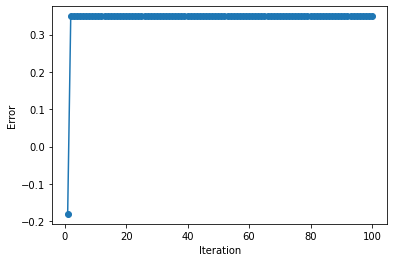

In [442]:
##### Update this Class #####

import numpy as np
from sklearn.preprocessing import MinMaxScaler, Normalizer

scaler = MinMaxScaler()

features = list(diabetes)[:-1]
X = scaler.fit_transform(diabetes[features])
Y = diabetes['Outcome']

class Perceptron_b:
    
    def __init__(self, niter = 100):
        self.niter = niter
        self.errors = []
        self.weights = None
    
    def __sigmoid(self, x):
        return 1/(1+np.exp(-x))
    
    def __sigmoid_derivative(self, x):
        sx = sigmoid(x)
        return sx*(1-sx)

    def fit(self, X, y):
        """
        Fit training data
        X : Training vectors, X.shape : [#samples, #features]
        y : Target values, y.shape : [#samples]
        """

        X = np.array(X)
        y = np.array(Y).reshape(len(y), 1)

        # Randomly Initialize Weights
        self.weights = np.random.randn(X.shape[1], 1)

        for i in range(self.niter):
            # Weighted sum of inputs / weights
            weighted_sum = np.dot(X, self.weights)

            # Activate!
            activated_output = self.__sigmoid(weighted_sum)

            # Calc error
            error = y - activated_output

            # Update the Weights
            adjustment = error * self.__sigmoid_derivative(weighted_sum)
            self.weights = self.weights + np.dot(X.T, adjustment)
            self.errors.append(error.mean())

    def predict(self, X):
        """
        Return class label after unit step
        """
        weighted_sum = np.dot(X, self.weights)
        activated_output = self.__sigmoid(weighted_sum)
        return int(np.round(activated_output))

network_b = Perceptron_b()
network_b.fit(X, Y)

from matplotlib import pyplot as plt
plt.plot(range(1, len(network_b.errors) + 1), network_b.errors, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.show()

## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?